# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from twilio.rest import Client

In [2]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1441 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 398 images belonging to 2 classes.


In [5]:
import math
total_train=1441
total_val=398
batch_size=32
spe=math.ceil(total_train/batch_size)


In [6]:
total_val=398
batch_size=32
vs= math.ceil(total_val/batch_size)


## Part 2 - Building the CNN

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


### Step 3 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

## Part 3 - Training the CNN

### Compiling the CNN

In [15]:
cnn.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [16]:
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 25, steps_per_epoch=spe)

Epoch 1/25
46/46 [==============================] - 52s 1s/step - loss: 0.5681 - accuracy: 0.7217 - val_loss: 0.3621 - val_accuracy: 0.8618
Epoch 2/25
46/46 [==============================] - 32s 690ms/step - loss: 0.3249 - accuracy: 0.8799 - val_loss: 0.2643 - val_accuracy: 0.9095
Epoch 3/25
46/46 [==============================] - 32s 699ms/step - loss: 0.2595 - accuracy: 0.8987 - val_loss: 0.2311 - val_accuracy: 0.9246
Epoch 4/25
46/46 [==============================] - 31s 677ms/step - loss: 0.2229 - accuracy: 0.9070 - val_loss: 0.2055 - val_accuracy: 0.9347
Epoch 5/25
46/46 [==============================] - 31s 668ms/step - loss: 0.2284 - accuracy: 0.8987 - val_loss: 0.2049 - val_accuracy: 0.9422
Epoch 6/25
46/46 [==============================] - 31s 681ms/step - loss: 0.1988 - accuracy: 0.9237 - val_loss: 0.2294 - val_accuracy: 0.9146
Epoch 7/25
46/46 [==============================] - 32s 697ms/step - loss: 0.1910 - accuracy: 0.9264 - val_loss: 0.2218 - val_accuracy: 0.9146
Ep

# Plotting Graphs

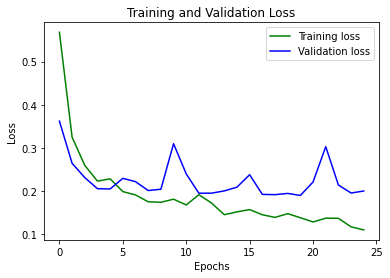

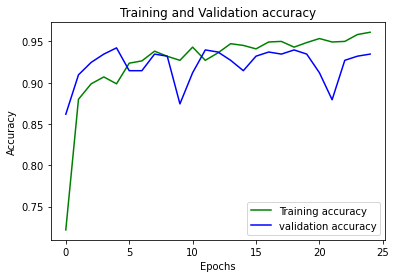

In [17]:
l1_adamax=history.history['loss']
l2_adamax=history.history['val_loss']
l3_adamax=history.history['accuracy']
l4_adamax=history.history['val_accuracy']
epochs=range(1,10)
plt.plot(l1_adamax,'g',label='Training loss')
plt.plot(l2_adamax,'b',label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
epochs = range(1,11)
plt.plot(l3_adamax, 'g', label='Training accuracy')
plt.plot(l4_adamax, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Part 4 - Making a single prediction

In [32]:

test_image = image.load_img('dataset/single_prediction/cyc.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [33]:
print(training_set.class_indices)

{'Cyclone': 0, 'Earthquake': 1}


In [34]:
if result[0][0] == 1:
  prediction = 'Earth Quake'
else:
  prediction = 'Cyclone'

In [35]:
print(prediction)

Cyclone


In [22]:
from skimage.metrics import structural_similarity
import cv2

def orb_sim(img1, img2):
  orb = cv2.ORB_create()
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
 
  matches = bf.match(desc_a, desc_b)

  similar_regions = [i for i in matches if i.distance < 50]  
  if len(matches) == 0:
    return 0
  return len(similar_regions) / len(matches)




img1 = cv2.imread(r'C:\Users\AJAY THERALA\OneDrive\Desktop\Major Project\dataset\single_prediction\cyclone.jpg', 0) 
img2 = cv2.imread(r'C:\Users\AJAY THERALA\OneDrive\Desktop\Major Project\dataset\single_prediction\cyc.jpg', 0) 


orb_similarity = orb_sim(img1, img2) 
orb_similarity=str(orb_similarity*1000)

# Part 5 Sending Alert Notification

In [23]:
dlist=['Cyclone','Earth Quake']
if prediction in dlist:
    account_sid = 'AC3b76c8518bed5726fe5e558f143f020f'
    auth_token = '4ebd0e39bb30d88e9950ecd06e7f1347'
    client = Client(account_sid, auth_token)
    message = client.messages.create(body='Alert!!! '+prediction+' predicted with the similarity of '+orb_similarity+' in your region. Please move to the safest region as soon as possible!!!!!!!!!', from_=[+13132543124]
    , to=[+919492853680])
    print(message.sid)

SMf1f1dd76f1544d679b6a8e460a30524d


In [24]:
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/eq.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [25]:
if result[0][0] == 1:
  prediction = 'Earth Quake'
else:
  prediction = 'Cyclone'
print(prediction)

Earth Quake


In [26]:
from skimage.metrics import structural_similarity
import cv2

def orb_sim(img1, img2):
  orb = cv2.ORB_create()
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
 
  matches = bf.match(desc_a, desc_b)

  similar_regions = [i for i in matches if i.distance < 50]  
  if len(matches) == 0:
    return 0
  return len(similar_regions) / len(matches)




img1 = cv2.imread(r'C:\Users\AJAY THERALA\OneDrive\Desktop\Major Project\dataset\single_prediction\cyclone.jpg', 0) 
img2 = cv2.imread(r'C:\Users\AJAY THERALA\OneDrive\Desktop\Major Project\dataset\single_prediction\cyc1.jpg', 0) 


orb_similarity = orb_sim(img1, img2) 
orb_similarity=str(orb_similarity*1000)

In [27]:
dlist=['Cyclone','Earth Quake']
if prediction in dlist:
    account_sid = 'AC3b76c8518bed5726fe5e558f143f020f'
    auth_token = '4ebd0e39bb30d88e9950ecd06e7f1347'
    client = Client(account_sid, auth_token)
    message = client.messages.create(body='Alert!!! '+prediction+' predicted with the similarity of '+orb_similarity+' in your region. Please move to the safest region as soon as possible!!!!!!!!!', from_=[+13132543124]
    , to=[+919492853680])
    print(message.sid)

SM435a1dc6690744deb27390048adb93c1
